In [2]:
import pandas as pd

In [43]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
recipes = pd.read_csv(r"C:\Users\const\TELECOM\DATA\Projet_Mangetamain\data\RAW_recipes.csv") # à modifier pour lire RAW_recipes

### Sur ce notebook, on a fait deux études : celui des étapes pour réaliser les recettes, et le temps de réalisation

Dans un premier temps, on constate que pour les étapes des recettes, une étude simplifiée des données suffit, car celles-ci ne présentent pas d’incohérences particulières.
En revanche, pour les autres données, un travail de prétraitement a été nécessaire, suivi de l’application d’une méthode de clustering plus complexe afin d’obtenir une segmentation pertinente et exploitable.

# Données pour n_étapes

On compte le nombre de recettes pour chaque nombre d’étapes, puis on affiche les résultats sous forme d’histogramme.

In [45]:
count_by_steps = recipes.groupby('n_steps')['id'].count() #compte le nombre de step

In [18]:
"calcul de moyenne, médiane, mode pour afficher sur l'histogramme"
mean_steps = recipes['n_steps'].mean()
median_steps = recipes['n_steps'].median()
mode_steps = recipes['n_steps'].mode()[0]

In [19]:
print(f"Moyenne : {mean_steps:.2f}")
print(f"Médiane : {median_steps}")
print(f"Mode : {mode_steps}")

Moyenne : 9.77
Médiane : 9.0
Mode : 7


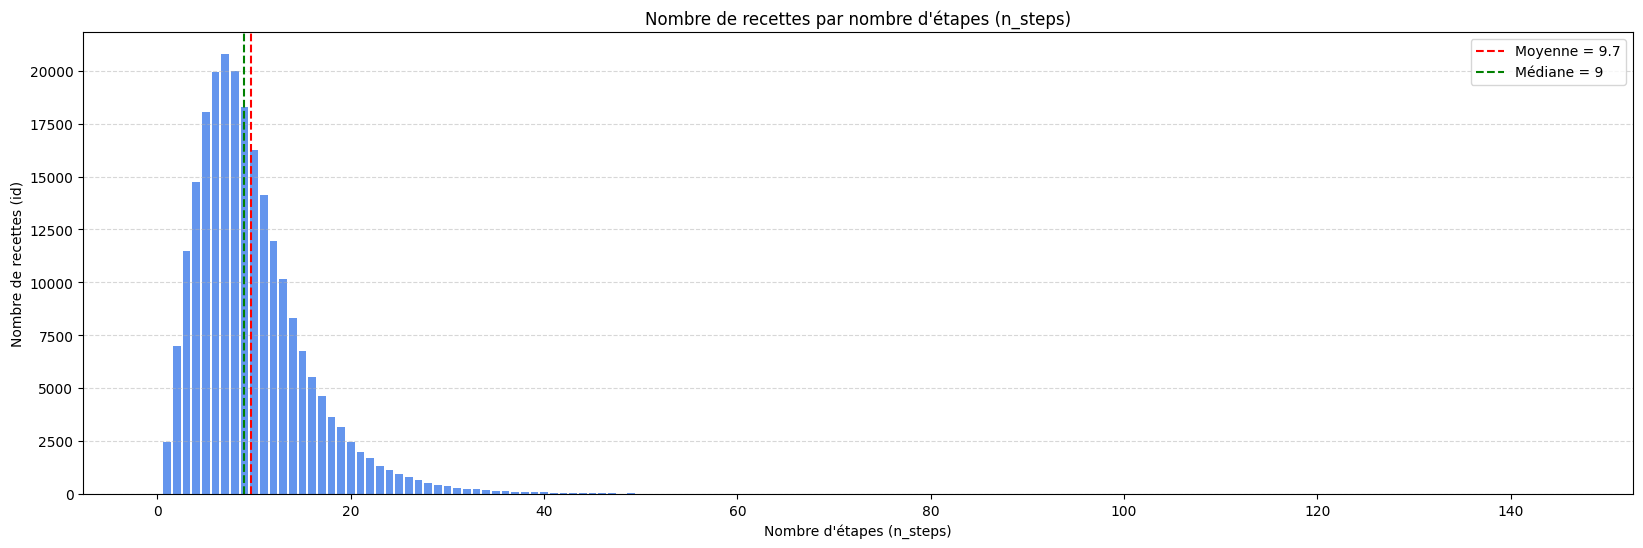

In [46]:
plt.figure(figsize=(20,6))
plt.bar(count_by_steps.index, count_by_steps.values, color='cornflowerblue')
plt.axvline(mean_steps, color='red', linestyle='--', label=f'Moyenne = {mean_steps:.1f}')
plt.axvline(median_steps, color='green', linestyle='--', label=f'Médiane = {median_steps:.0f}')
plt.title("Nombre de recettes par nombre d'étapes (n_steps)")
plt.xlabel("Nombre d'étapes (n_steps)")
plt.ylabel("Nombre de recettes (id)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.show()

### Ici, les données sont assez distinctes, il n'y a pas besoin de méthodes de clustering complexes comme K-means. Une approche basée sur les quartiles et la moyenne peut suffire pour segmenter les recettes en groupes cohérents.

Moyenne : 9.73
Médiane : 9.0
Mode : 7


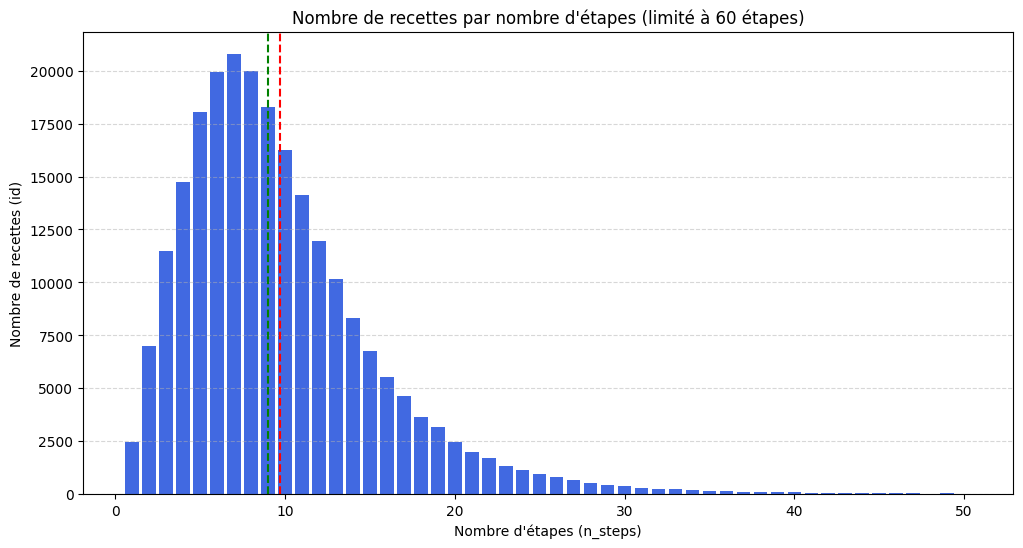

In [21]:
recipes_filtered = recipes[(recipes['n_steps'] > 0) & (recipes['n_steps'] <= 50)] #s'arrêter à 50 steps 
# Regrouper par n_steps et compter le nombre d'identifiants uniques
count_by_steps = recipes_filtered.groupby('n_steps')['id'].count().sort_index()

mean_steps = recipes_filtered['n_steps'].mean()
median_steps = recipes_filtered['n_steps'].median()
mode_steps = recipes_filtered['n_steps'].mode()[0]

print(f"Moyenne : {mean_steps:.2f}")
print(f"Médiane : {median_steps}")
print(f"Mode : {mode_steps}")

# Tracer l'histogramme
plt.figure(figsize=(12,6))
plt.bar(count_by_steps.index, count_by_steps.values, color='royalblue')

plt.axvline(mean_steps, color='red', linestyle='--', label=f'Moyenne = {mean_steps:.1f}')
plt.axvline(median_steps, color='green', linestyle='--', label=f'Médiane = {median_steps:.0f}')

plt.title("Nombre de recettes par nombre d'étapes (limité à 60 étapes)")
plt.xlabel("Nombre d'étapes (n_steps)")
plt.ylabel("Nombre de recettes (id)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [22]:
Q1 = recipes_filtered['n_steps'].quantile(0.25) #Premier quartile
Q3 = recipes_filtered['n_steps'].quantile(0.75) #Troisième quartile

In [23]:
print(f"Q1 = {Q1}, Q3 = {Q3}")

Q1 = 6.0, Q3 = 12.0


In [24]:
def steps_category(x):
    if x < Q1:
        return 'recette simple'
    elif x <= Q3:
        return 'recette moyenne'
    else:
        return 'recette complexe'

recipes_filtered = recipes_filtered.copy()  # crée une copie indépendante
recipes_filtered['steps_category'] = recipes_filtered['n_steps'].apply(steps_category)

### Ici, on définit les catégories en fonction si la recette est simple, moyenne ou complexe par rapport au nombre de steps

In [25]:
import seaborn as sns

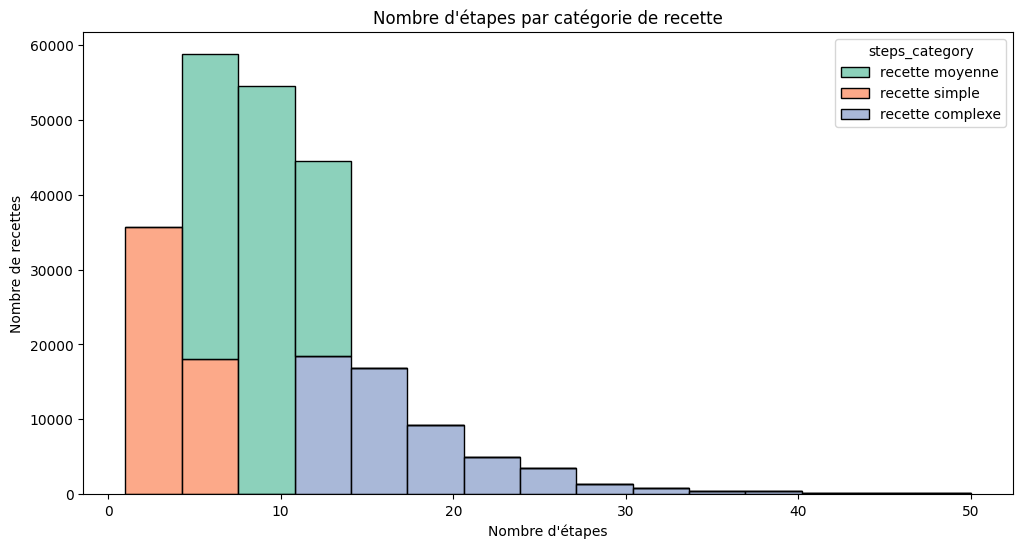

In [26]:
plt.figure(figsize=(12,6))
sns.histplot(data=recipes_filtered, x='n_steps', hue='steps_category', bins=15, palette='Set2', multiple='stack')
plt.title("Nombre d'étapes par catégorie de recette")
plt.xlabel("Nombre d'étapes")
plt.ylabel("Nombre de recettes")
plt.show()

# Données sur le temps à réaliser les recettes

On commence par la même méthode que précedemment.

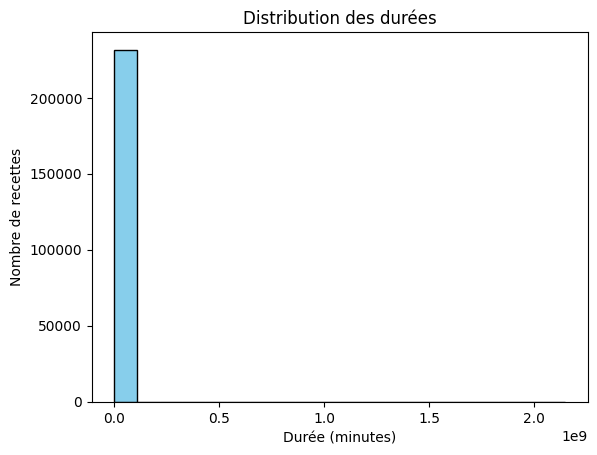

In [27]:
plt.hist(recipes['minutes'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Durée (minutes)")
plt.ylabel("Nombre de recettes")
plt.title("Distribution des durées")
plt.show()

### L'histogramme est peu parlant. On manque beaucoup d'informations. On procède par scatter

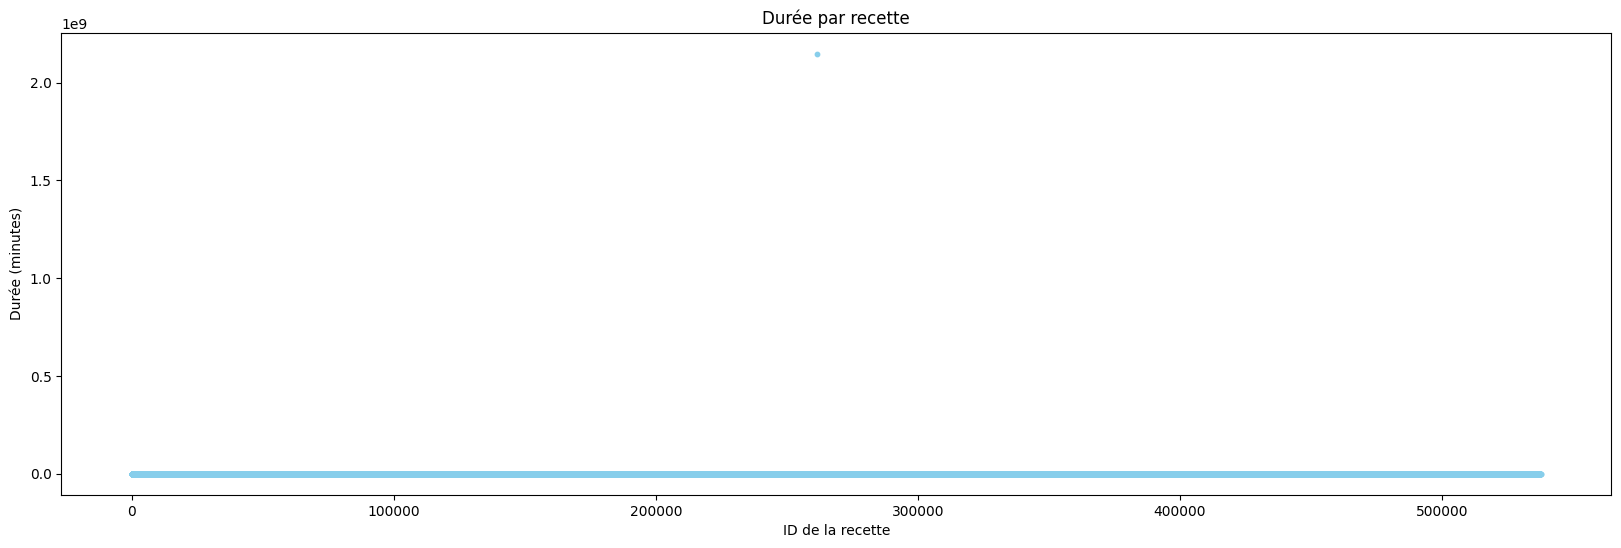

In [28]:
plt.figure(figsize=(20,6))
plt.scatter(recipes['id'], recipes['minutes'], s=10, color='skyblue')  # s=taille du point
plt.ylabel("Durée (minutes)")
plt.xlabel("ID de la recette")
plt.title("Durée par recette")
plt.show()

### On constate un outlier pour un temps de l'ordre de $10^{9}$ minutes.

On regarde les recettes les plus longues à la réalisation

In [29]:
# Afficher les 10 recettes les plus longues avec leurs noms
print(recipes[['name', 'n_steps', 'minutes']].sort_values(by='minutes', ascending=False).head(10))

                                                 name  n_steps     minutes
144074                          no bake granola balls        9  2147483647
109624                      how to preserve a husband        9     1051200
106563                         homemade fruit liquers       12      288000
38116   celtic druid s honey mead   meade   metheglin       18      259260
106963                               homemade vanilla        9      259205
155044                                   peach brandy        9      216015
5497                                 angelica liqueur        7      201610
177906                                        rumtopf       16      187200
170999                              raspberry liqueur        7      172810
53721                                cinnamon extract        5      172800


In [30]:
print(f"la recette la plus longue réalisée en",2147483647/(60*24),"jour")

la recette la plus longue réalisée en 1491308.0881944445 jour


### La démarche suivante est de remplacer l'outlier du temps par la moyenne puisqu'on peut considérer que c'est une erreur puisque c'est excessif d'avoir 149 1309 jours pour réaliser une recette

On va remplacer cette valuer par la valeur moyenne en temps de réalisation.

In [31]:
mean_time = recipes['minutes'].mean()
print(f"Le temps moyen pour réaliser l'ensemble des recettes",mean_time, "min")

Le temps moyen pour réaliser l'ensemble des recettes 9398.546009488984 min


In [32]:
recipes.loc[recipes['minutes'] == 2147483647, 'minutes'] = int(mean_time) #remplace le terme par la moyenne

In [33]:
print(recipes[['name', 'n_steps', 'minutes']].sort_values(by='minutes', ascending=False).head(10)) #vérficiation si le changement a été réalisé

                                                 name  n_steps  minutes
109624                      how to preserve a husband        9  1051200
106563                         homemade fruit liquers       12   288000
38116   celtic druid s honey mead   meade   metheglin       18   259260
106963                               homemade vanilla        9   259205
155044                                   peach brandy        9   216015
5497                                 angelica liqueur        7   201610
177906                                        rumtopf       16   187200
170999                              raspberry liqueur        7   172810
53721                                cinnamon extract        5   172800
102299                               hard apple cider       11   167040


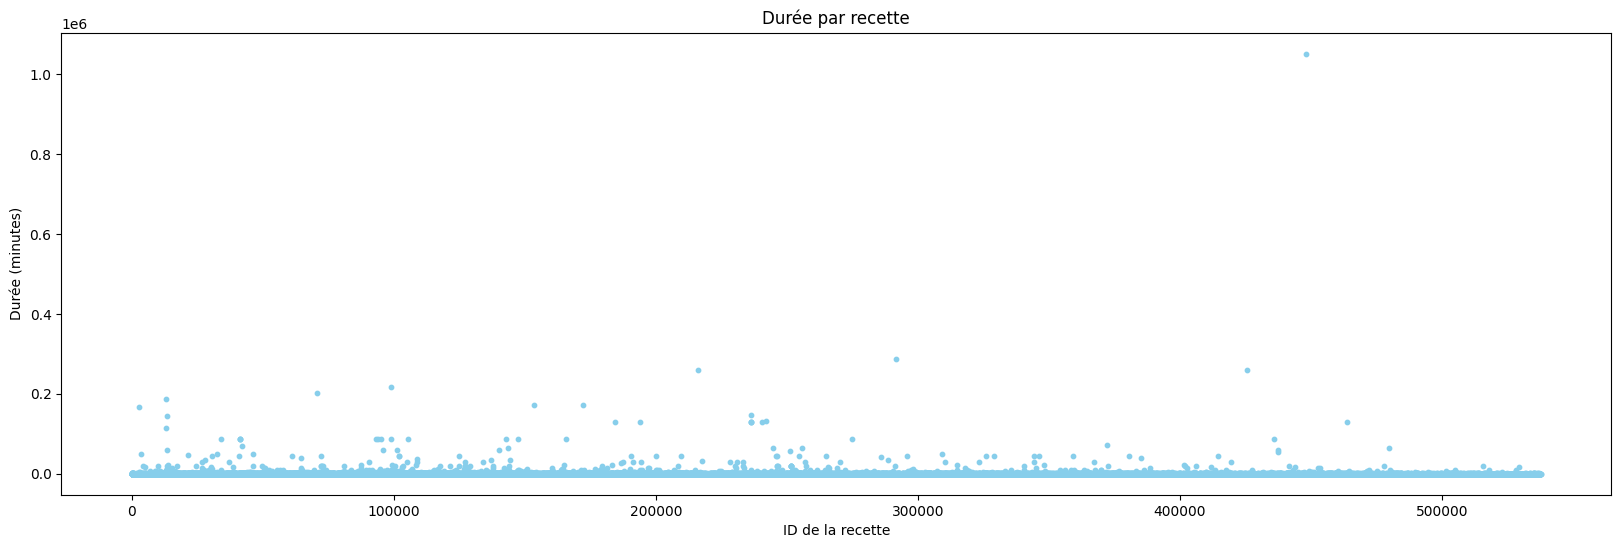

In [34]:
plt.figure(figsize=(20,6))
plt.scatter(recipes['id'], recipes['minutes'], s=10, color='skyblue')  # s=taille du point
plt.ylabel("Durée (minutes)")
plt.xlabel("ID de la recette")
plt.title("Durée par recette")
plt.show()

### Un autre outlier est présent dans la courbe

In [35]:
print(f"la deuxième recette la plus longue réalisée en",1051200/(60*24),"jour")

la deuxième recette la plus longue réalisée en 730.0 jour


### Même constat: la valeur est excessive, nous allons le remplacer par la valeur moyenne

In [36]:
recipes.loc[recipes['minutes'] == 1051200, 'minutes'] = int(mean_time)

In [37]:
print(recipes[['name', 'n_steps', 'minutes']].sort_values(by='minutes', ascending=False).head(10)) #vérification

                                                   name  n_steps  minutes
106563                           homemade fruit liquers       12   288000
38116     celtic druid s honey mead   meade   metheglin       18   259260
106963                                 homemade vanilla        9   259205
155044                                     peach brandy        9   216015
5497                                   angelica liqueur        7   201610
177906                                          rumtopf       16   187200
170999                                raspberry liqueur        7   172810
53721                                  cinnamon extract        5   172800
102299                                 hard apple cider       11   167040
171791  recipe for elephant stew  from griot s cookbook        6   146880


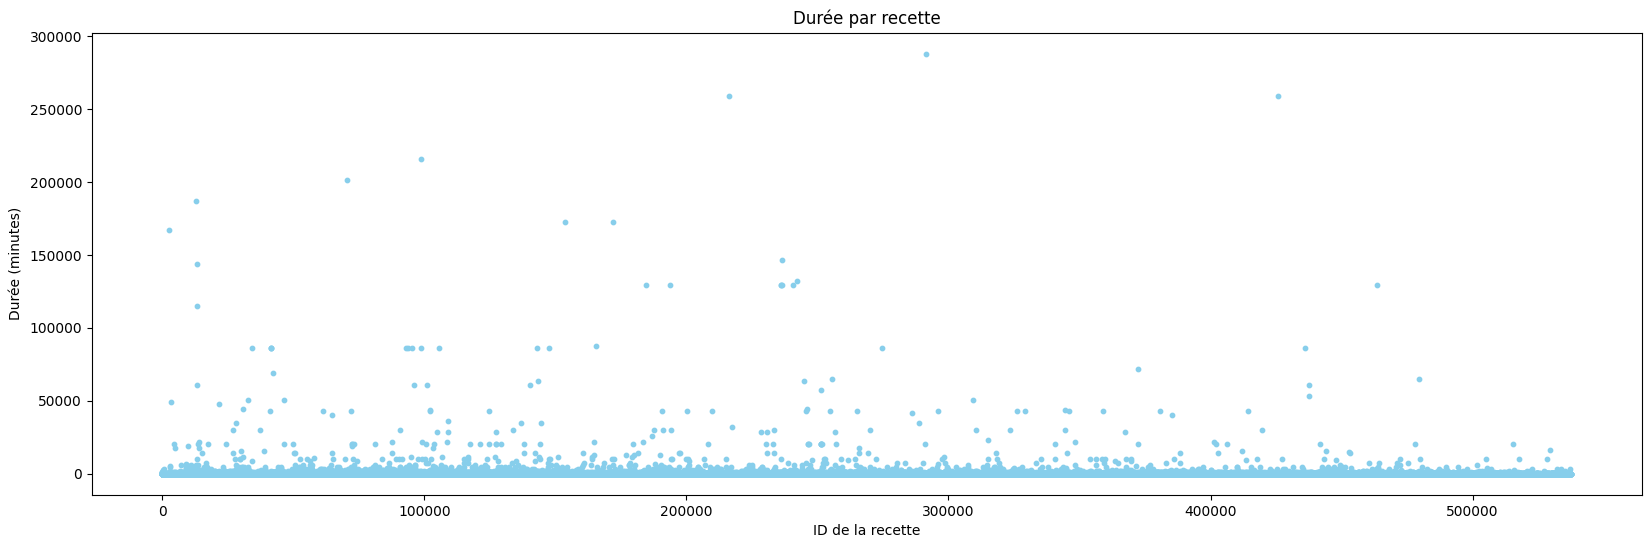

In [38]:
plt.figure(figsize=(20,6))
plt.scatter(recipes['id'], recipes['minutes'], s=10, color='skyblue')  # s=taille du point
plt.ylabel("Durée (minutes)")
plt.xlabel("ID de la recette")
plt.title("Durée par recette")
plt.show()

### Affiche la courbe sous forme logarithmique

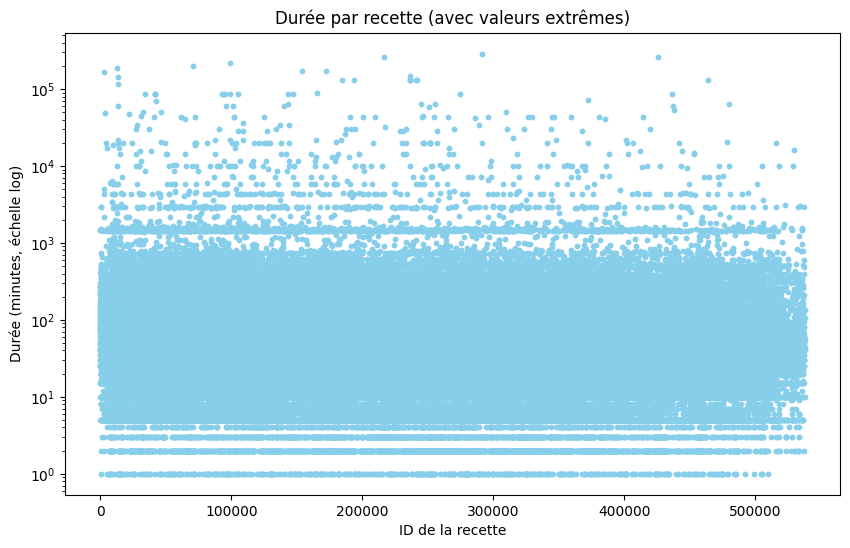

In [39]:
#on met les durées en logaritmique afin de pouvoir mieux représenter les résultats
plt.figure(figsize=(10,6))
plt.scatter(recipes['id'], recipes['minutes'], s=10, color='skyblue')
plt.yscale('log')  # met l'axe Y en échelle log
plt.xlabel("ID de la recette")
plt.ylabel("Durée (minutes, échelle log)")
plt.title("Durée par recette (avec valeurs extrêmes)")
plt.show()

### On utilise Kmeans pour réaliser les clusters

La méthode du coude permet de déterminer le nombre optimal de clusters en observant l’évolution de l’inertie (somme des distances au carré entre les points et leur centroïde) en fonction du nombre de clusters. Le point où la diminution de l’inertie devient moins significative correspond au “coude”, indiquant un bon compromis entre complexité du modèle et qualité du regroupement.

In [48]:
from sklearn.cluster import KMeans

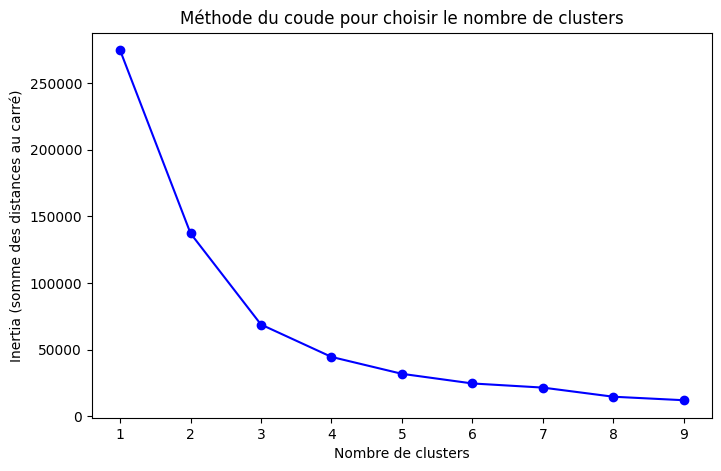

In [49]:
"le code calcule l'inertie pour plusieurs valeurs à l'aide de l'algorithme K-means, puis trace la courbe correspondante"

# Préparer les données (log pour compresser les valeurs extrêmes)
X = np.log1p(recipes['minutes']).values.reshape(-1, 1)

# Tester plusieurs nombres de clusters
inertia = []
K_range = range(1, 10)  # tester de 1 à 9 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Tracer la courbe du coude
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertia (somme des distances au carré)")
plt.title("Méthode du coude pour choisir le nombre de clusters")
plt.show()

### Par la méthode du coude, nous pouvons prendre 3 car la baisse est notable mais moins forte et c'est à ce moment-là que la courbe commence à se stabiliser

On va déterminer les différents clusters.

In [50]:
X = np.log1p(recipes['minutes']).values.reshape(-1, 1)  # log pour compresser les valeurs extrêmes
recipes['cluster'] = KMeans(n_clusters=3, random_state=42).fit_predict(X)

In [51]:
recipes.groupby('cluster')['minutes'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,140038.0,49.632407,20.743894,23.0,30.0,45.0,60.0,113.0
1,63760.0,12.563676,6.177805,0.0,7.0,15.0,20.0,22.0
2,27839.0,746.559431,5666.336828,114.0,145.0,215.0,405.0,288000.0


### Il y a donc trois clusters distincts qui seront indiqués ci-dessous.

In [52]:
recipes[recipes['cluster'] == 0]['name'].head(20)

0            arriba   baked winter squash mexican style
1                      a bit different  breakfast pizza
3                                    alouette  potatoes
9                               beat this  banana bread
16                                       chile rellenos
18                                   chinese  chop suey
19                    cream  of cauliflower soup  vegan
20                               cream  of spinach soup
21                        cream  of spinach soup  vegan
22                              crispy crunchy  chicken
24                      easiest ever  hollandaise sauce
26                          fool the meat eaters  chili
28                                      fried  potatoes
29                george s at the cove  black bean soup
30                          get the sensation  brownies
31                       global gourmet  taco casserole
33                             grilled  venison burgers
36    how i got my family to eat spinach  spinac

Le cluster 0 regroupe clairement les recettes “standard” de cuisine maison, qui demandent entre 30 et 60 minutes.

In [53]:
recipes[recipes['cluster'] == 1]['name'].head(20)

5                        apple a day  milk shake
6                          aww  marinated olives
10                   berry  good sandwich spread
14                       calm your nerves  tonic
17                                chinese  candy
23                    deep fried dessert thingys
25              emotional balance  spice mixture
32                          grilled  ranch bread
34            healthy for them  yogurt popsicles
35           homemade  vegetable soup from a can
40    i stole the idea from mirj  sesame noodles
45                                italian  fries
59                      mennonite  corn fritters
61               mock a mole   low fat guacamole
62                     momma s special  marinade
65                 munch without guilt  tomatoes
66                        my muffuletta sandwich
67                     never weep  whipped cream
77            pour over anything  mushroom gravy
84                    say what   banana sandwich
Name: name, dtype: o

Le cluster 1 regroupe la catégorie “recettes rapides / boissons / snacks / sauces”.

In [54]:
recipes[recipes['cluster'] == 2]['name'].head(20)

2                      all in the kitchen  chili
4             amish  tomato ketchup  for canning
7                 backyard style  barbecued ribs
8                       bananas 4 ice cream  pie
11                 better than sex  strawberries
12               better then bush s  baked beans
13                    boat house  collard greens
15              chicken lickin  good  pork chops
27                         forgotten  minestrone
47                 jeanne s style  birthday cake
50         keep it going  german friendship cake
58                            marijuana  vinegar
63             more  more    apple pear jigglers
64    mr  grant you took half veal prince orloff
68            no bake  cookie crumble cheesecake
70                     off the cob  freezer corn
78      put down your fork   tuna and bean salad
79                 real  italian bolognese sauce
80                           red hot  applesauce
81                           red  macaroni salad
Name: name, dtype: o

Le cluster 2 regroupe principalement des conserves ou préparations stockées sur le long terme

### On affiche la répartition des recettes par cluster

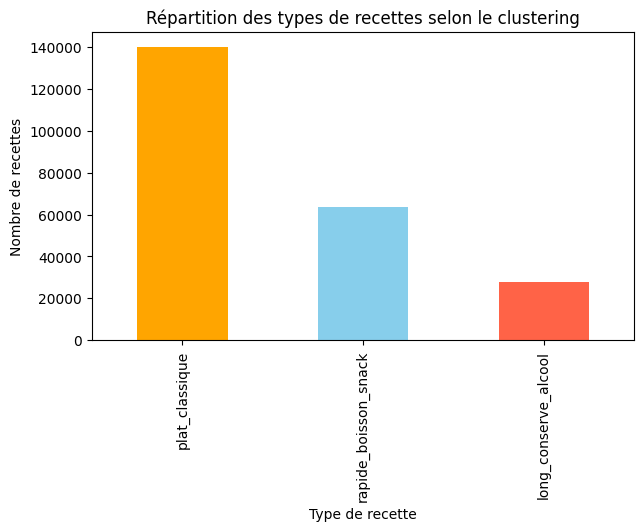

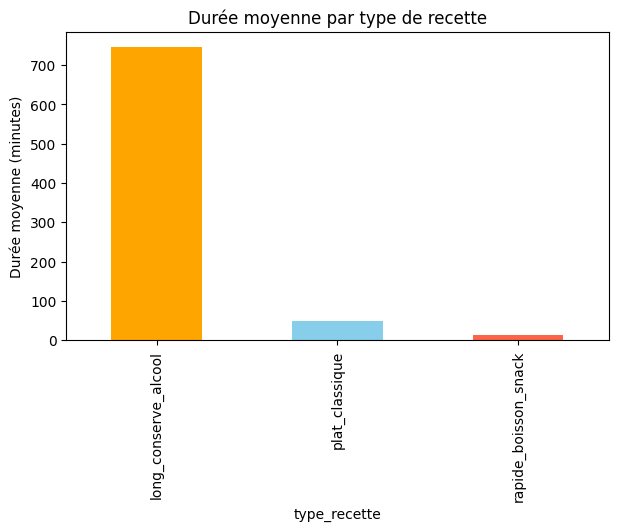

In [55]:
cluster_labels = {
    0: "plat_classique",
    1: "rapide_boisson_snack",
    2: "long_conserve_alcool"
}

# Appliquer les labels au DataFrame
recipes["type_recette"] = recipes["cluster"].map(cluster_labels)

# Tracer la répartition
ax = recipes["type_recette"].value_counts().plot(
    kind="bar",
    color=["orange", "skyblue", "tomato"],
    figsize=(7,4)
)

means = recipes.groupby("type_recette")["minutes"].mean()

plt.title("Répartition des types de recettes selon le clustering")
plt.ylabel("Nombre de recettes")
plt.xlabel("Type de recette")
plt.show()

means.plot(kind="bar", color=["orange","skyblue","tomato"], figsize=(7,4))
plt.ylabel("Durée moyenne (minutes)")
plt.title("Durée moyenne par type de recette")
plt.show()

### On représente les trois clusters par ID_recette

C:\Users\const\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


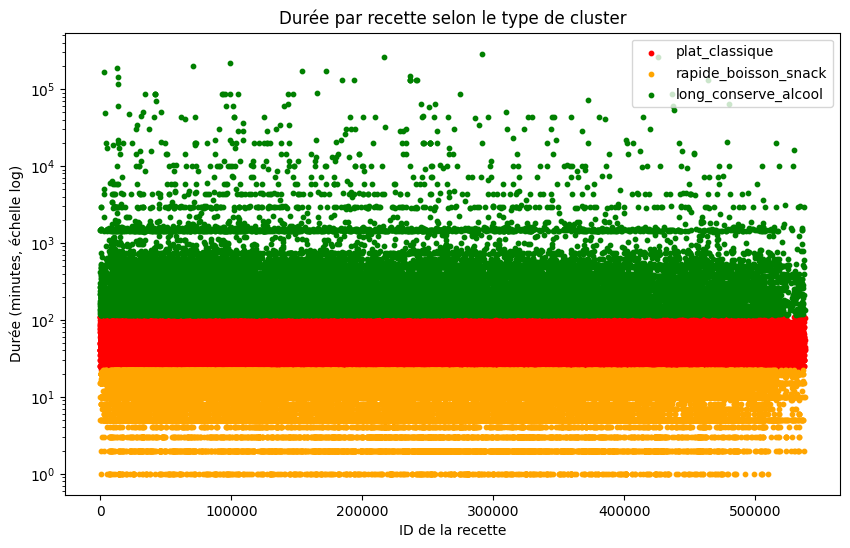

In [56]:
# Définir des couleurs pour chaque cluster
colors = {
    "plat_classique": "red",
    "rapide_boisson_snack": "orange",
    "long_conserve_alcool": "green"
}

plt.figure(figsize=(10,6))

# Boucle pour tracer chaque cluster avec une couleur différente
for cluster_type, color in colors.items():
    subset = recipes[recipes["type_recette"] == cluster_type]
    plt.scatter(subset['id'], subset['minutes'], s=10, color=color, label=cluster_type)

plt.yscale('log')  # Axe Y en échelle log
plt.ylabel("Durée (minutes, échelle log)")
plt.xlabel("ID de la recette")
plt.title("Durée par recette selon le type de cluster")
plt.legend()  # Affiche la légende
plt.show()

### On constate que cette variable peut être combinée avec d’autres features pour distinguer l’ensemble des plats classiques. Ce cluster compte 140 038 recettes, ce qui représente un effectif relativement important comparé aux autres clusters. La méthode employée ici est overkill, analysons d'une autre façon

# Tracer les histogrammes et spécifier la moyenne pour la durée des recettes et le nombre d'ingrédients

In [82]:
mean_temps = recipes[recipes['minutes']<800]['minutes'].mean()
median_temps = recipes[recipes['minutes']<800]['minutes'].median()
mode_temps = recipes[recipes['minutes']<800]['minutes'].mode()[0]

In [83]:
print(f"Moyenne : {mean_temps:.2f}")
print(f"Médiane : {median_temps}")
print(f"Mode : {mode_temps}")

Moyenne : 62.78
Médiane : 40.0
Mode : 30


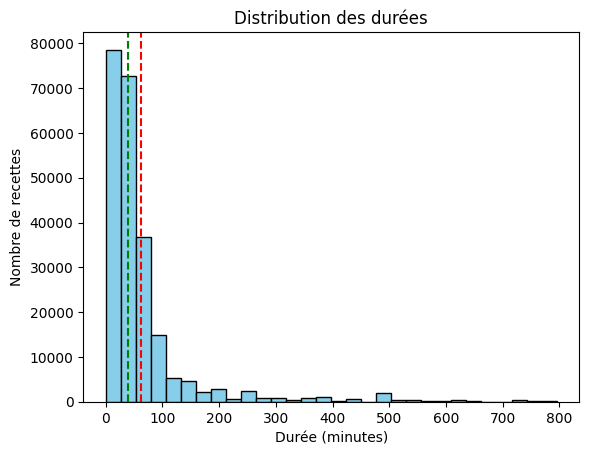

In [85]:
plt.hist(recipes[recipes['minutes']<800]['minutes'], bins=30, color='skyblue', edgecolor='black')
plt.axvline(mean_temps, color='red', linestyle='--', label=f'Moyenne = {mean_steps:.1f}')
plt.axvline(median_temps, color='green', linestyle='--', label=f'Médiane = {median_steps:.0f}')
plt.xlabel("Durée (minutes)")
plt.ylabel("Nombre de recettes")
plt.title("Distribution des durées")
plt.show()

# nombre ingrédients

In [86]:
mean_n_ingredient = recipes[recipes['n_ingredients']<35]['n_ingredients'].mean()
median_n_ingredient = recipes[recipes['n_ingredients']<35]['n_ingredients'].median()
mode_n_ingredient = recipes[recipes['n_ingredients']<35]['n_ingredients'].mode()[0]

In [87]:
print(f"Moyenne : {mean_n_ingredient:.2f}")
print(f"Médiane : {median_n_ingredient}")
print(f"Mode : {mode_n_ingredient}")

Moyenne : 9.05
Médiane : 9.0
Mode : 8


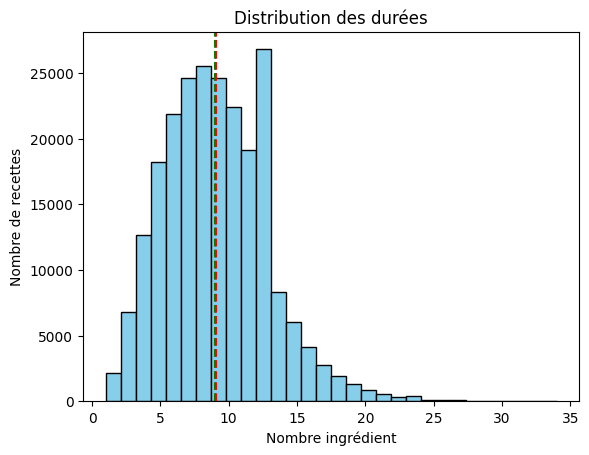

In [89]:
plt.hist(recipes[recipes['n_ingredients']<35]['n_ingredients'], bins=30, color='skyblue', edgecolor='black')
plt.axvline(mean_n_ingredient, color='red', linestyle='--', label=f'Moyenne = {mean_steps:.1f}')
plt.axvline(median_n_ingredient, color='green', linestyle='--', label=f'Médiane = {median_steps:.0f}')
plt.xlabel("Nombre ingrédient")
plt.ylabel("Nombre de recettes")
plt.title("Distribution des durées")
plt.show()

# Corrélation entre durée, étapes et nombre d'ingrédients

In [6]:
import seaborn as sns

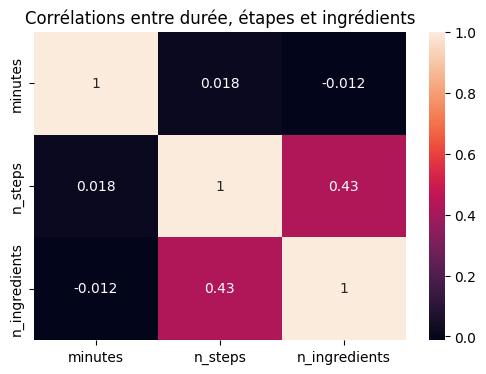

In [68]:
plt.figure(figsize=(6,4))
sns.heatmap(recipes[['minutes', 'n_steps', 'n_ingredients']].corr(), annot=True)
plt.title("Corrélations entre durée, étapes et ingrédients")
plt.show()

### Il n'y a pas de corrélations entre la durée et le nombre d'étapes. Cependant, il y a une corrélation modérée entre nombre d'ingrédients et nombre d'étapes

Détermination des features à partir de la corrélation du nombre d'ingrédients et nombre d'étapes

# Centré réduit : mettre à la même échelle

In [111]:
from sklearn.preprocessing import StandardScaler

# Colonnes à visualiser
cols = ['minutes', 'n_steps', 'n_ingredients']

# Standardisation : moyenne = 0, écart-type = 1
scaler = StandardScaler()
scaled_values = scaler.fit_transform(recipes[cols])

# DataFrame pour clarté
scaled_df = pd.DataFrame(scaled_values, columns=[f"{c}_z" for c in cols])
scaled_df.head()

,minutes_z,n_steps_z,n_ingredients_z
0,-0.034474,0.205918,-0.549202
1,-0.047114,-0.127687,-0.816955
2,0.003444,-0.628095,1.057315
3,-0.039530,0.205918,0.521809
4,0.033778,-0.794897,-0.281449


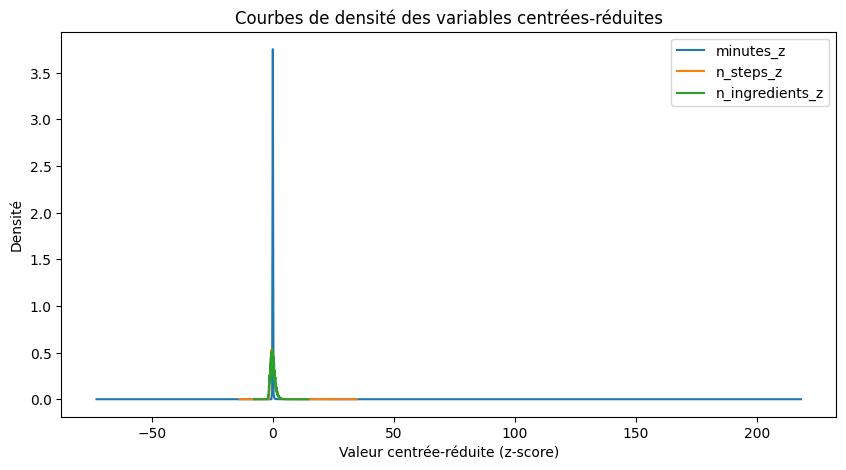

In [117]:
plt.figure(figsize=(10,5))

for col in scaled_df.columns:
    scaled_df[col].plot(kind='kde', label=col)  # courbe de densité

plt.xlabel("Valeur centrée-réduite (z-score)")
plt.ylabel("Densité")
plt.title("Courbes de densité des variables centrées-réduites")
plt.legend()
plt.show()

In [120]:
recipes['minutes_log'] = np.log1p(recipes['minutes'])  # log(1 + minutes) pour éviter log(0)

scaler = StandardScaler()
scaled_values = scaler.fit_transform(recipes[['minutes_log','n_steps','n_ingredients']])
scaled_df = pd.DataFrame(scaled_values, columns=['minutes_z','n_steps_z','n_ingredients_z'])

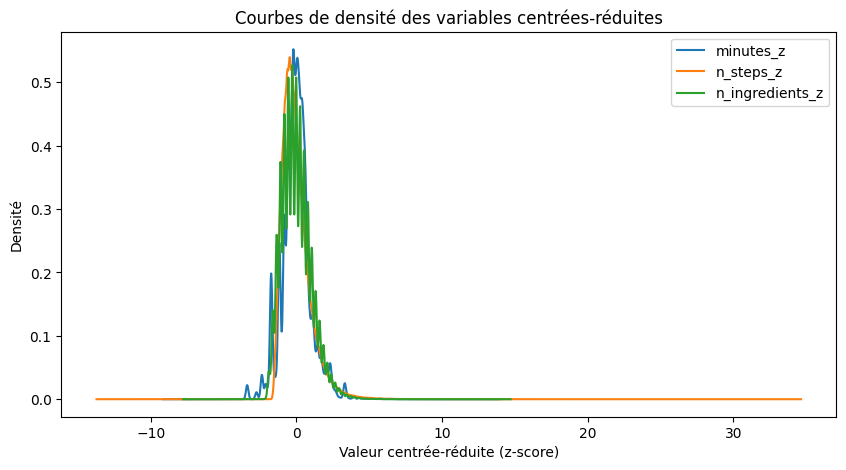

In [121]:
plt.figure(figsize=(10,5))

for col in scaled_df.columns:
    scaled_df[col].plot(kind='kde', label=col)  # courbe de densité

plt.xlabel("Valeur centrée-réduite (z-score)")
plt.ylabel("Densité")
plt.title("Courbes de densité des variables centrées-réduites")
plt.legend()
plt.show()

### Effectuer un histogramme 2D pour observer les différents features possibles

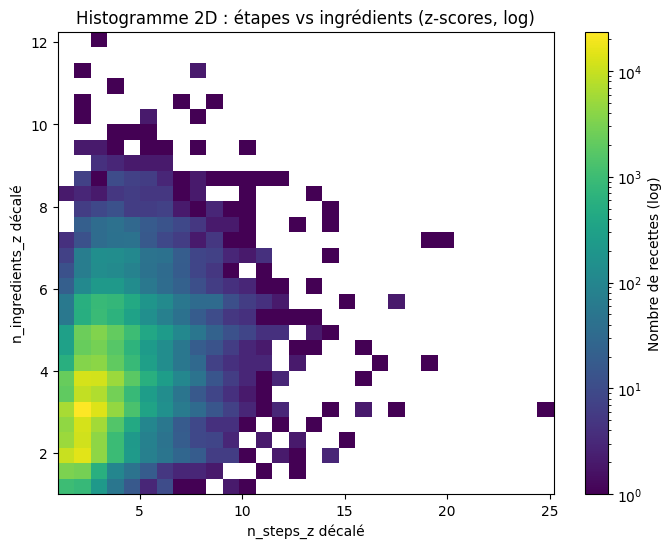

In [141]:
from matplotlib.colors import LogNorm

# Décalage pour rendre toutes les valeurs > 0
x = scaled_df['n_steps_z'] - scaled_df['n_steps_z'].min() + 1
y = scaled_df['n_ingredients_z'] - scaled_df['n_ingredients_z'].min() + 1

plt.figure(figsize=(8,6))
plt.hist2d(x, y, bins=[30,30], cmap='viridis', norm=LogNorm())
plt.colorbar(label='Nombre de recettes (log)')
plt.xlabel("n_steps_z décalé")
plt.ylabel("n_ingredients_z décalé")
plt.title("Histogramme 2D : étapes vs ingrédients (z-scores, log)")
plt.show()

### Déterminer les features à partir des quartiles des nombres d'étapes et nombre d'ingrédients

In [149]:
recipes['n_steps_cat'] = pd.qcut(scaled_df['n_steps_z'], 3, labels=[0,1,2])
recipes['n_ingredients_cat'] = pd.qcut(scaled_df['n_ingredients_z'], 3, labels=[0,1,2])

In [150]:
recipes['cluster_ing_steps'] = recipes['n_steps_cat'].astype(str) + "_" + recipes['n_ingredients_cat'].astype(str)

In [157]:
recipes.groupby('cluster_ing_steps')[['minutes','n_steps','n_ingredients']].mean()

,minutes,n_steps,n_ingredients
cluster_ing_steps,,,
0_0,108.659508,4.626920,5.228901
0_1,85.289278,5.199520,8.856247
0_2,108.413081,5.479885,12.697349
1_0,179.953925,9.207877,5.718610
1_1,87.316228,9.352511,8.963839
1_2,88.928197,9.516768,13.035006
2_0,310.538757,15.639091,5.883343
2_1,137.851156,15.962405,9.080704
2_2,119.720141,17.723915,13.948662


In [162]:
pd.set_option('display.max_columns', None)   
pd.set_option('display.max_colwidth', None)
cluster_summary = pd.DataFrame({
    'n_steps': ['Faible','Faible','Faible','Moyen','Moyen','Moyen','Élevé','Élevé','Élevé'],
    'n_ingredients': ['Faible','Moyen','Élevé','Faible','Moyen','Élevé','Faible','Moyen','Élevé'],
    'minutes_moyenne': [108,85,108,180,87,89,311,138,120],
    'Interprétation': [
        'Peu d’étapes et peu d’ingrédients : Peu d’étapes, peu d’ingrédients = recettes simples mais durée relativement longue (peut-être des plats mijotés courts)',
        'Peu d’étapes, ingrédients moyens : Peu d’étapes, ingrédients moyens = recettes simples mais plus riches',
        'Peu d’étapes, beaucoup d’ingrédients : Peu d’étapes, beaucoup d’ingrédients = simple mais très “chargée',
        'Étapes intermédiaires, peu d’ingrédients : Étapes moyennes, peu d’ingrédients = intermédiaire en complexité mais longue durée',
        'Étapes intermédiaires, ingrédients moyens : Étapes moyennes, ingrédients moyens = recettes intermédiaires “classiques”',
        'Étapes intermédiaires, beaucoup d’ingrédients : Étapes moyennes, beaucoup d’ingrédients = intermédiaire mais dense',
        'Beaucoup d’étapes, peu d’ingrédients : Beaucoup d’étapes, peu d’ingrédients = long et technique mais pas chargé en ingrédients',
        'Beaucoup d’étapes et ingrédients moyens : Beaucoup d’étapes et d’ingrédients moyens = complexe et long',
        'Beaucoup d’étapes et d’ingrédients : Beaucoup d’étapes, beaucoup d’ingrédients = recettes très complexes'
    ]
}, index=['0_0','0_1','0_2','1_0','1_1','1_2','2_0','2_1','2_2']) 
cluster_summary


,n_steps,n_ingredients,minutes_moyenne,Interprétation
0_0,Faible,Faible,108,"Peu d’étapes et peu d’ingrédients : Peu d’étapes, peu d’ingrédients = recettes simples mais durée relativement longue (peut-être des plats mijotés courts)"
0_1,Faible,Moyen,85,"Peu d’étapes, ingrédients moyens : Peu d’étapes, ingrédients moyens = recettes simples mais plus riches"
0_2,Faible,Élevé,108,"Peu d’étapes, beaucoup d’ingrédients : Peu d’étapes, beaucoup d’ingrédients = simple mais très “chargée"
1_0,Moyen,Faible,180,"Étapes intermédiaires, peu d’ingrédients : Étapes moyennes, peu d’ingrédients = intermédiaire en complexité mais longue durée"
1_1,Moyen,Moyen,87,"Étapes intermédiaires, ingrédients moyens : Étapes moyennes, ingrédients moyens = recettes intermédiaires “classiques”"
1_2,Moyen,Élevé,89,"Étapes intermédiaires, beaucoup d’ingrédients : Étapes moyennes, beaucoup d’ingrédients = intermédiaire mais dense"
2_0,Élevé,Faible,311,"Beaucoup d’étapes, peu d’ingrédients : Beaucoup d’étapes, peu d’ingrédients = long et technique mais pas chargé en ingrédients"
2_1,Élevé,Moyen,138,Beaucoup d’étapes et ingrédients moyens : Beaucoup d’étapes et d’ingrédients moyens = complexe et long
2_2,Élevé,Élevé,120,"Beaucoup d’étapes et d’ingrédients : Beaucoup d’étapes, beaucoup d’ingrédients = recettes très complexes"


In [153]:
recipes['cluster_label_ing_steps'] = recipes['cluster_ing_steps'].map({
    '0_0': 'simple faible',
    '0_1': 'simple moyen',
    '0_2': 'simple élevé',
    '1_0': 'intermédiaire faible',
    '1_1': 'intermédiaire moyen',
    '1_2': 'intermédiaire élevé',
    '2_0': 'complexe faible',
    '2_1': 'complexe moyen',
    '2_2': 'complexe élevé',
})

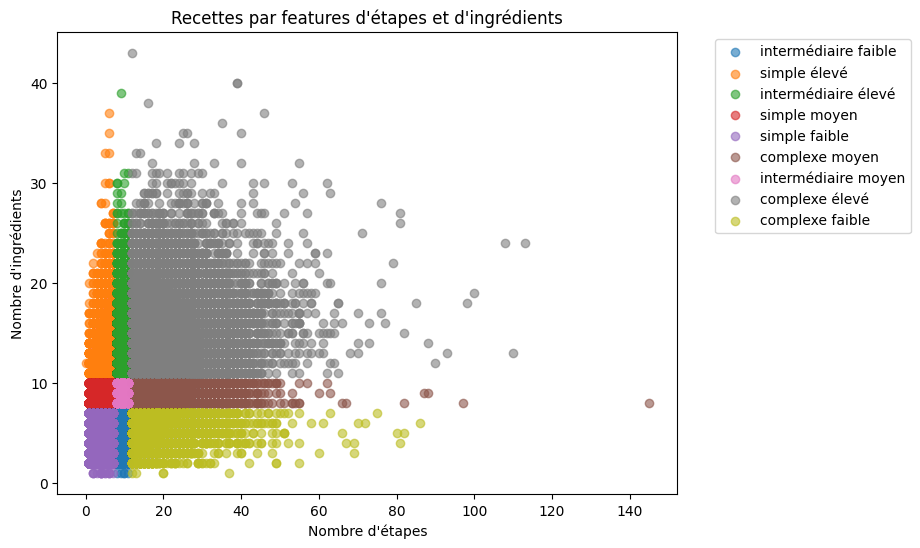

In [174]:
plt.figure(figsize=(8,6))
for label in recipes['cluster_label_ing_steps'].unique():
    subset = recipes[recipes['cluster_label_ing_steps'] == label]
    plt.scatter(
        subset['n_steps'], 
        subset['n_ingredients'], 
        label=label,
        alpha=0.6
    )

plt.xlabel("Nombre d'étapes")
plt.ylabel("Nombre d'ingrédients")
plt.title("Recettes par features d'étapes et d'ingrédients")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [168]:
# On suppose que scaled_df a les colonnes ['minutes_z','n_steps_z','n_ingredients_z']
recipes[['minutes_z','n_steps_z','n_ingredients_z']] = scaled_df[['minutes_z','n_steps_z','n_ingredients_z']]

# Si tu as log1p pour les minutes
recipes['minutes_log'] = np.log1p(recipes['minutes'])

In [171]:
columns_to_export = [
    'id',                     # identifiant de la recette
    'minutes', 'n_steps', 'n_ingredients',  # colonnes originales
    'minutes_z', 'n_steps_z', 'n_ingredients_z',  # colonnes centrées-réduites
    'minutes_log',                  # colonne log
    'cluster_ing_steps',            # cluster combiné quantiles
    'cluster_label_ing_steps'       # label lisible du cluster
]

export_df = recipes[columns_to_export]

# Exporter en CSV
export_df.to_csv('recipes_clusters_cngy.csv', index=False)

# Vérifier
export_df.head()

,id,minutes,n_steps,n_ingredients,minutes_z,n_steps_z,n_ingredients_z,minutes_log,cluster_ing_steps,cluster_label_ing_steps
0,137739,55,11,7,0.320590,0.205918,-0.549202,4.025352,1_0,intermédiaire faible
1,31490,30,9,6,-0.222550,-0.127687,-0.816955,3.433987,1_0,intermédiaire faible
2,112140,130,6,13,1.101133,-0.628095,1.057315,4.875197,0_2,simple élevé
3,59389,45,11,11,0.139921,0.205918,0.521809,3.828641,1_2,intermédiaire élevé
4,44061,190,5,8,1.447460,-0.794897,-0.281449,5.252273,0_1,simple moyen
